In [1]:
import eda
import ann
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

2025-08-06 11:19:23.727510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754493563.738659 3539247 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754493563.742226 3539247 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754493563.751619 3539247 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754493563.751629 3539247 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754493563.751630 3539247 computation_placer.cc:177] computation placer alr

In [2]:
dados = eda.data_processing('Cotas extraidas', '1985-01-01', '2023-12-31', ['dados_diarios_estacao_14845000.csv'])
dados

,14845000
Data,
1985-01-01,253.0
1985-01-02,252.0
1985-01-03,252.0
1985-01-04,249.0
1985-01-05,245.0
...,...
2023-12-27,345.0
2023-12-28,345.0
2023-12-29,345.0


### Separação dos conjuntos

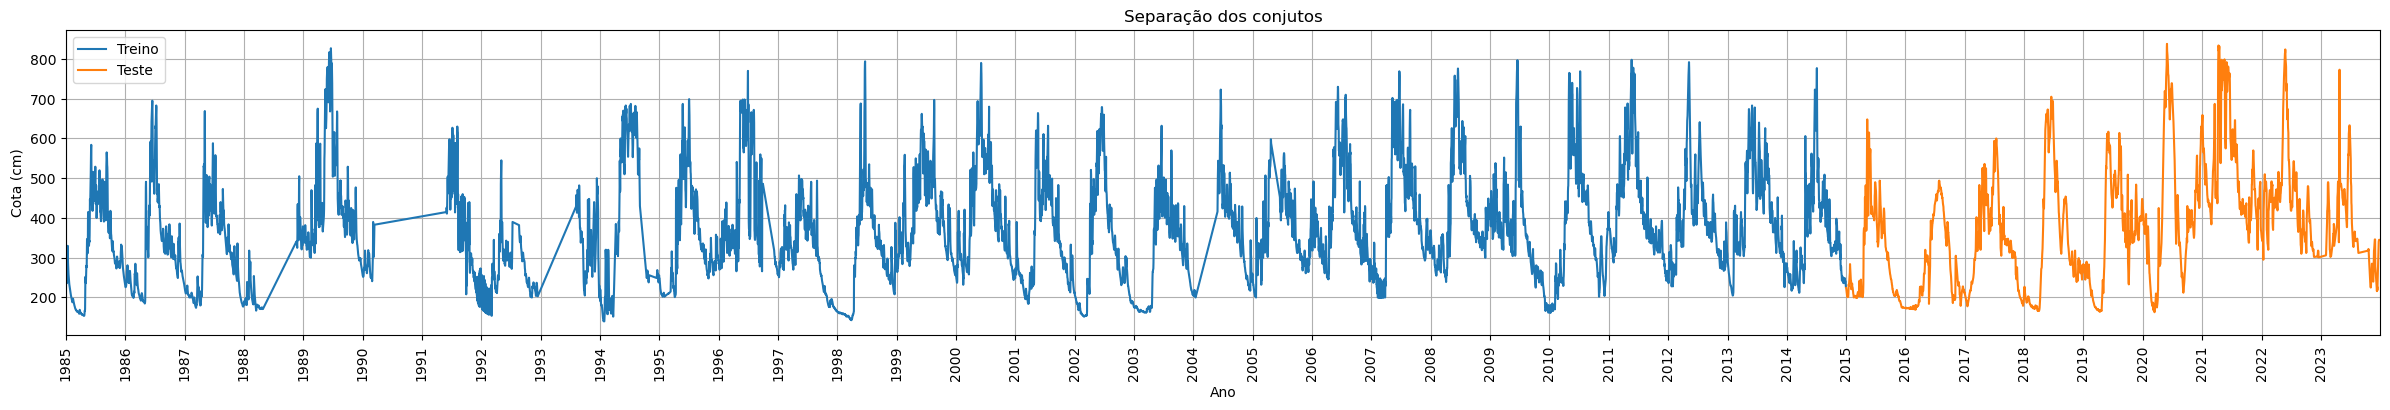

In [3]:
treino = dados[:'2014-12-31']
teste = dados['2015-01-01':]

plt.figure(figsize=(24, 4))
plt.plot(treino)
plt.plot(teste)
plt.legend(['Treino', 'Teste'])
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Ano')
plt.ylabel('Cota (cm)')
plt.xticks(rotation=90)
plt.xlim(dados.index[0], dados.index[-1])
plt.tight_layout()
plt.title('Separação dos conjutos')
plt.show()

In [4]:
def create_multi_step_dataset(series, janela, n_steps):
    X, y = [], []
    for i in range(len(series) - janela - n_steps + 1):
        X.append(series[i:i+janela])
        y.append(series[i+janela:i+janela+n_steps])
    return np.array(X), np.array(y)

In [5]:
janela = 15
steps = 15

X, y = create_multi_step_dataset(dados['14845000'].values, janela, steps)

x_train = X[:treino.shape[0]-janela]
y_train = y[:treino.shape[0]-janela]

x_test = X[treino.shape[0]-janela:]
y_test = y[treino.shape[0]-janela:]

x_scale = MinMaxScaler()
x_train = x_scale.fit_transform(x_train)
x_test = x_scale.transform(x_test)

y_scale = MinMaxScaler()
y_train = y_scale.fit_transform(y_train)

### LSTM

In [6]:
lstm = ann.build_model_lstm(15, janela, steps)

lstm.summary()

I0000 00:00:1754493565.387853 3539247 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8812 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │           240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,260 (4.92 KB)

 Trainable params: 1,260 (4.92 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
lstm.fit(x_train, y_train, epochs=100)

Epoch 1/100


I0000 00:00:1754493566.942415 3539523 cuda_dnn.cc:529] Loaded cuDNN version 90300


342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0637 - mean_absolute_error: 0.1767
Epoch 2/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0694
Epoch 3/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0687
Epoch 4/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0666
Epoch 5/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0660
Epoch 6/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0638
Epoch 7/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0622
Epoch 8/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0630
Epoch 9/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0624
Epoch 10/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0619
Epoch 11/100
342/342 ━━━━━━━━━━

In [8]:
pred = lstm.predict(x_test)
pred_inv = y_scale.inverse_transform(pred)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [9]:
r2_score(y_test, pred_inv)

0.8018874355674032

In [10]:
horizonte = [1, 7, 15]

R²: 0.9860


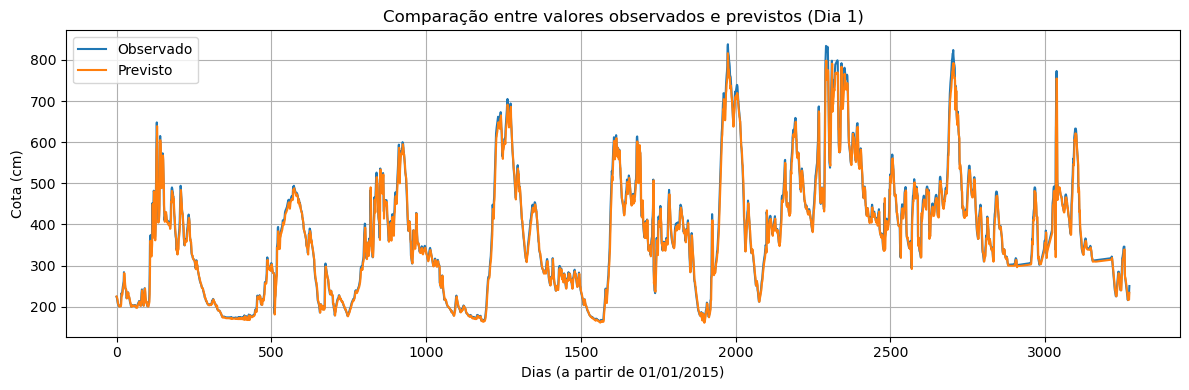

R²: 0.8110


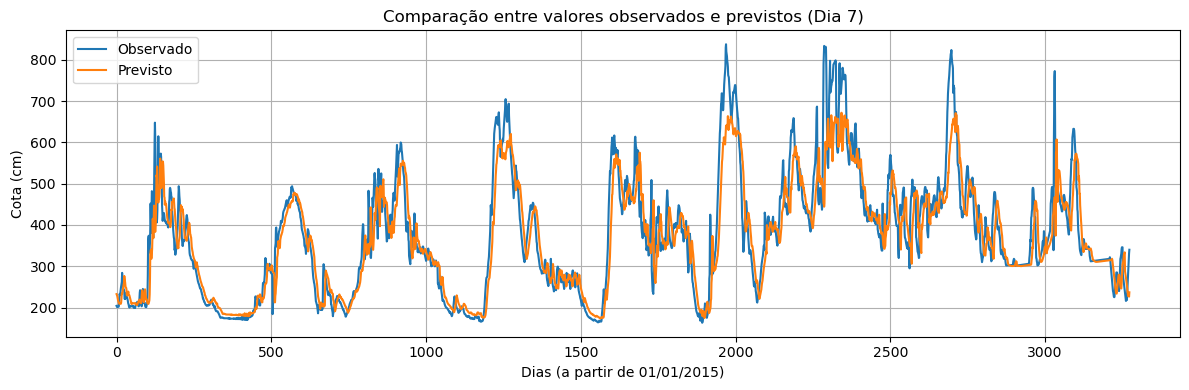

R²: 0.6588


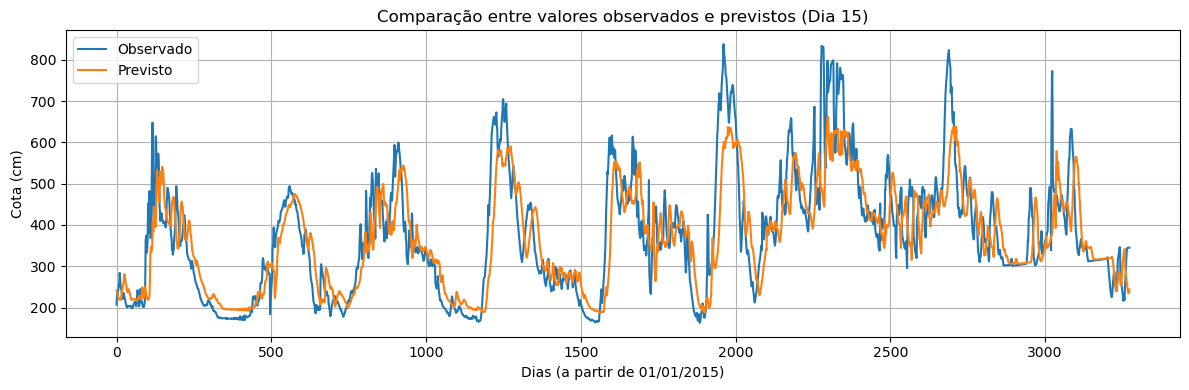

In [11]:
for i in horizonte:
    print(f"R²: {r2_score(y_test[:,i-1], pred_inv[:,i-1]):.4f}")

    plt.figure(figsize=(12, 4))
    plt.plot(y_test[:,i-1], label='Observado')
    plt.plot(pred_inv[:,i-1], label='Previsto')
    plt.xlabel('Dias (a partir de 01/01/2015)')
    plt.ylabel('Cota (cm)')
    plt.title(f'Comparação entre valores observados e previstos (Dia {i})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### MLP

In [12]:
mlp = ann.build_model_mlp((15, 15), janela, steps)

mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 720 (2.81 KB)

 Trainable params: 720 (2.81 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
mlp.fit(x_train, y_train, epochs=100)

Epoch 1/100


I0000 00:00:1754493709.330449 3539522 service.cc:152] XLA service 0x77190039f0a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754493709.330468 3539522 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2025-08-06 11:21:49.345000: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


137/342 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1536 - mean_absolute_error: 0.2829

I0000 00:00:1754493709.962439 3539522 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1020 - mean_absolute_error: 0.2167
Epoch 2/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0090 - mean_absolute_error: 0.0655
Epoch 3/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.0086 - mean_absolute_error: 0.0638
Epoch 4/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0084 - mean_absolute_error: 0.0627
Epoch 5/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0084 - mean_absolute_error: 0.0622
Epoch 6/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.0085 - mean_absolute_error: 0.0625
Epoch 7/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0081 - mean_absolute_error: 0.0613
Epoch 8/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.0082 - mean_absolute_error: 0.0616
Epoch 9/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.0084 - mean_absolute_error: 0.0623
Epoch 10/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.0082 - mean_absolute_error: 0.0612
Epoch 11/100


In [14]:
pred2 = mlp.predict(x_test)
pred2_inv = y_scale.inverse_transform(pred2)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [15]:
r2_score(y_test, pred2_inv)

0.8048862750426359

R²: 0.9861


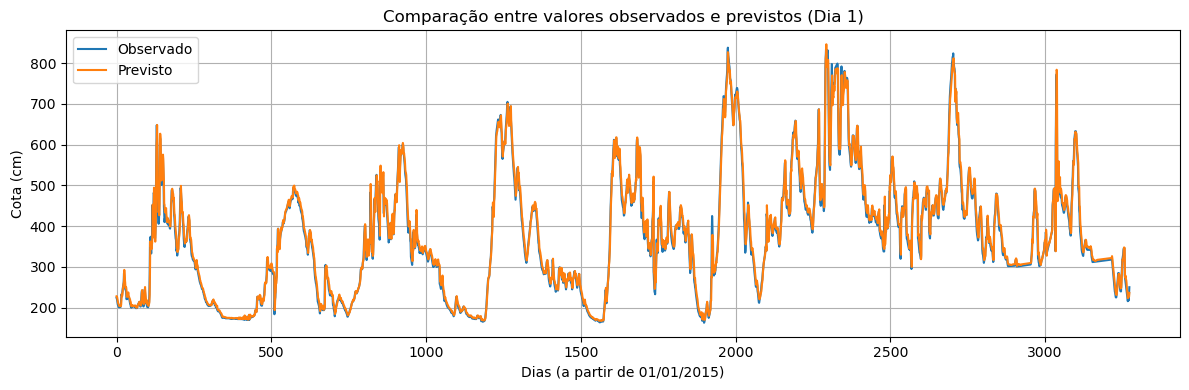

R²: 0.8139


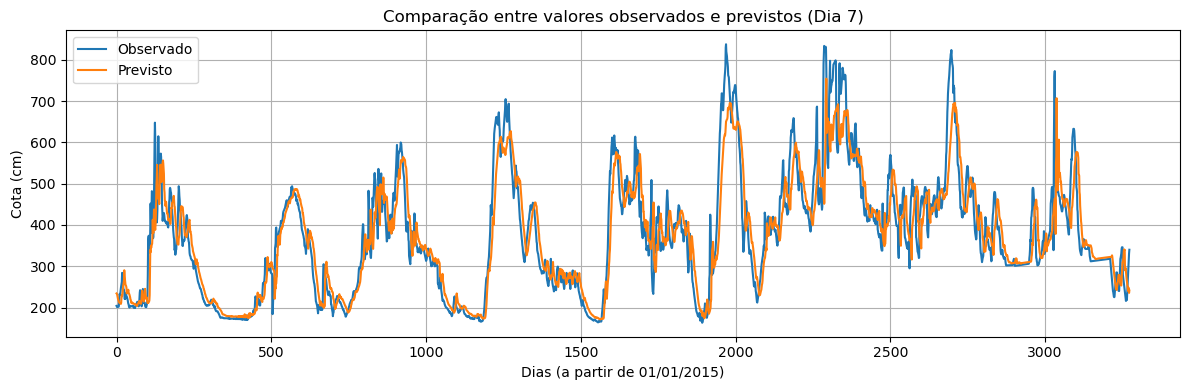

R²: 0.6609


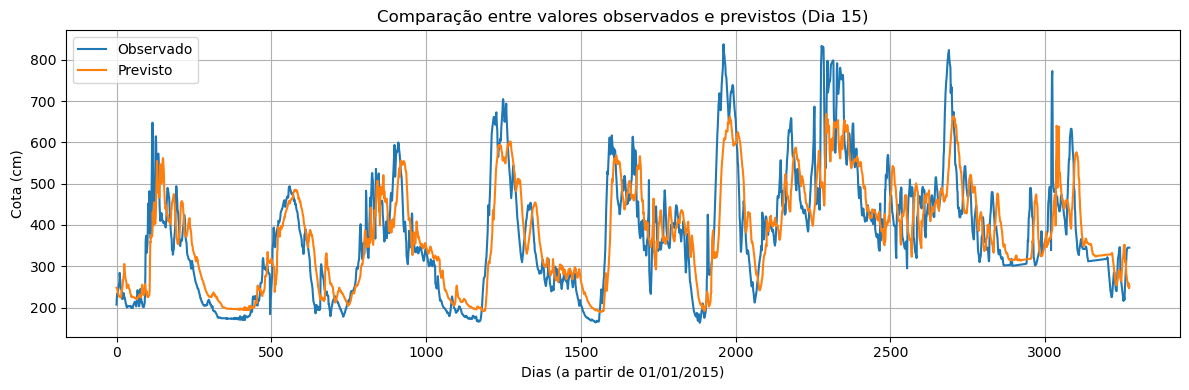

In [16]:
for i in horizonte:
    print(f"R²: {r2_score(y_test[:,i-1], pred2_inv[:,i-1]):.4f}")

    plt.figure(figsize=(12, 4))
    plt.plot(y_test[:,i-1], label='Observado')
    plt.plot(pred2_inv[:,i-1], label='Previsto')
    plt.xlabel('Dias (a partir de 01/01/2015)')
    plt.ylabel('Cota (cm)')
    plt.title(f'Comparação entre valores observados e previstos (Dia {i})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()